# Plooto D2.3
# 3.1.6 Description of the service specialization per pilot: Italian Pilot – Use case 2: Prediction of prepreg quality

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random
import ipywidgets as widgets
from IPython.display import display,clear_output

def load_excel_files(directory):
    # Dictionary to store the dataframes
    dataframes = {}

    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is an Excel file
        if filename.endswith('.xlsx'):
            # Construct the full file path
            file_path = os.path.join(directory, filename)
            # Load the Excel file into a pandas dataframe
            df = pd.read_excel(file_path)
            # Add the dataframe to the dictionary with the filename (without extension) as the key
            dataframes[os.path.splitext(filename)[0]] = df

    return dataframes

directory = 'data'
excel_dataframes = load_excel_files(directory)

In [2]:
metadata = pd.read_excel('process data REV2 16-05-24.xlsx', skiprows=1)

## Processes metadata

In [3]:
metadata

,Cycle date,Item,Operator,PREPREG LOT,DAYS AFTER PREPREG PRODUCTION,tool,cycles after tool manteinance,Curve,quality result,reason of defect,Colonna2
0,2024-02-15,M33402,CA,8-24,3,CH1,16,800,100,NaN,NaN
1,2024-02-20,S311464,CA,8-24,3,CH1,17,806,100,NaN,NaN
2,2024-02-21,LO41679,GA,8-24,4,CH1,18,808,0,operator,NaN
3,2024-02-27,S311508,CA,8-24,10,CH1,19,815,100,NaN,NaN
4,2024-02-28,S311521,CA,8-24,11,CH1,20,817,100,NaN,NaN
5,2024-02-29,M21590,LD,8-24,12,CH1,1,819,100,NaN,NaN
6,2024-03-01,S311544,LD,8-24,13,CH1,2,821,100,NaN,NaN
7,2024-03-04,LO41707,CA,8-24,16,CH1,3,822,100,NaN,NaN
8,2024-03-06,M21592,DF,23-24,2,CH1,4,824,100,NaN,NaN
9,2024-03-07,M21596,DF,23-24,3,CH1,5,825,100,NaN,NaN


### Because there were only 4 cases where the product was defective we multiplied the processes where the error was due to tool mainteinance and process parameters to achive a ratio where half of the cases are OK and half are defective.

In [4]:
for i in range(22):
    excel_dataframes[str(i)] = copy.deepcopy(excel_dataframes['852'])
for i in range(22):
    excel_dataframes[str(i+22)] = copy.deepcopy(excel_dataframes['879'])

In [5]:
df = excel_dataframes['22']

# Plotting the line plot without setting Date as index
#plt.figure(figsize=(10, 6))
#plt.plot(df['Time_sec'], df['CHAMBER TEMP. [°C]'], marker='o', linestyle='-')
#plt.title('CHAMBER TEMP. [°C]')
#plt.xlabel('Time_sec')
#plt.ylabel('CHAMBER TEMP. [°C]')
#plt.show()

#25-75 del krivulje uzemi za slope
# Good quality vs bad quality 1:1., evalvacija 1:1 na koncu pa razmerje kot je dejansko
#fastapi Create it. Mi bi imeli /clasification, nardili post parametri of feature vectorja 
# Interactive API swagger
#Change point detection notebooks/pilots/italian/crfpnekineki
#https://github.com/Nici1/anomaly-detection/blob/main/notebooks/pilots/Italian/CFRP_production_Cetma%20_Composites.ipynb

In [6]:
# failures: 852, 808, 879, 839

In [7]:
df = excel_dataframes['879']

#plt.figure(figsize=(10, 6))
#plt.plot(df['Time_sec'], df['VACUUM mBar'], marker='o', linestyle='-')
#plt.title('CHAMBER TEMP. [°C]')
#plt.xlabel('Time_sec')
#plt.ylabel('CHAMBER TEMP. [°C]')
#plt.grid(True)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#plt.show()

In [8]:
# Nižji tlaki, zgeneriraj podobne primere
#UI for demo demonstration, klikneš excel (select new data), je ok ni ok (verjetnost).

In [9]:
df = excel_dataframes['22']
df = df.iloc[20:].reset_index(drop=True)
df['Setpoint_diff'] = df['SETPOINT [°C]'].diff(periods=1,)

## Detecting points where the speed of growth changes

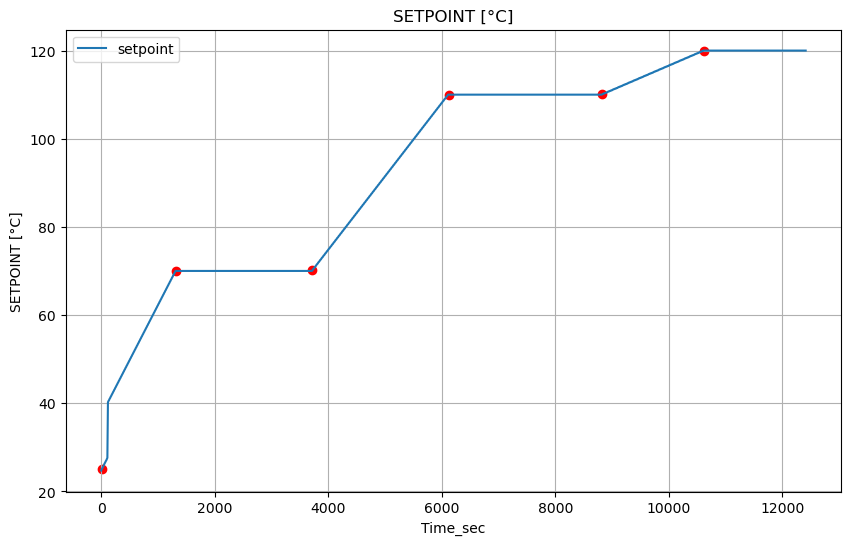

In [10]:
df = excel_dataframes['22']
# Calculate the difference between consecutive points
diff = np.diff(df['SETPOINT [°C]'])

# Identify points where the setpoint starts increasing
start_increase_points = np.where((diff > 0) & (np.hstack(([False], diff[:-1])) <= 0))[0] + 1

# Identify points where the setpoint stops increasing
stop_increase_points = np.where((diff <= 0) & (np.hstack(([False], diff[:-1])) > 0))[0] + 1

# Combine the start and stop points
significant_points = np.unique(np.concatenate(([0], start_increase_points, stop_increase_points)))
last = significant_points[-1]
significant_points = significant_points[1:6]
significant_points = np.append(significant_points,last)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Time_sec'], df['SETPOINT [°C]'], label='setpoint')
plt.scatter(df['Time_sec'].iloc[significant_points], df['SETPOINT [°C]'].iloc[significant_points], color='red')
plt.title('SETPOINT [°C]')
plt.xlabel('Time_sec')
plt.ylabel('SETPOINT [°C]')
plt.legend()
plt.grid(True)
plt.show()


### Display DataFrame of process (select ID from menu)

In [11]:
# Create a dropdown widget for selecting the dataframe
df_dropdown = widgets.Dropdown(
    options=list(excel_dataframes.keys()),
    description='DataFrame:',
    disabled=False,
)

# Function to display the selected dataframe
def display_dataframe(df_name):
    display(excel_dataframes[df_name])

# Create an interactive display
interactive_display = widgets.interactive(display_dataframe, df_name=df_dropdown)
display(interactive_display)

,Time_sec,SETPOINT [°C],CHAMBER TEMP. [°C],PIECE TEMP [°C],VACUUM mBar,VACUUM SETPOINT mBar
0,0,19.900000,19.6,19.700001,-817,-821
1,10,20.200001,19.6,19.700001,-828,-821
2,20,20.500000,19.6,19.700001,-823,-821
3,30,20.900000,19.6,19.700001,-819,-821
4,40,21.200001,19.6,19.799999,-818,-821
...,...,...,...,...,...,...
1237,12370,120.000000,120.0,126.099998,-817,-821
1238,12380,120.000000,120.0,126.099998,-826,-821
1239,12390,120.000000,120.0,126.199997,-823,-821
1240,12400,120.000000,120.0,126.099998,-821,-821


interactive(children=(Dropdown(description='DataFrame:', options=('800', '806', '808', '815', '817', '819', '8…

In [12]:
X_OK = []
Y_OK = []
X_NOTOK = []
Y_NOTOK = []

# Loop through all dataframes in the dictionary
for key, df in excel_dataframes.items():
    # Calculate the difference between consecutive points
    diff = np.diff(df['SETPOINT [°C]'])

    # Identify points where the setpoint starts increasing
    start_increase_points = np.where((diff > 0) & (np.hstack(([False], diff[:-1])) <= 0))[0] + 1

    # Identify points where the setpoint stops increasing
    stop_increase_points = np.where((diff <= 0) & (np.hstack(([False], diff[:-1])) > 0))[0] + 1

    # Combine the start and stop points
    significant_points = np.unique(np.concatenate(([0], start_increase_points, stop_increase_points)))
    last = significant_points[-1]
    significant_points = significant_points[1:6]
    significant_points = np.append(significant_points, last)
    
    # Calculate intervals
    significant_points
    intervals = []
    first = significant_points[0]
    for i in significant_points[1:]:
        j = i - first
        intervals.append(int(first + j * 0.25))
        intervals.append(int(first + j * 0.75))
        first = i

    chamber_points = []
    for point in significant_points:
        chamber_points.append(point+20)
    chamber_points[0] = significant_points[0]
    chamber_intervals = []
    for point in intervals:
        chamber_intervals.append(point+20)
    chamber_intervals[0] = intervals[0]
        
    X_Point_Values = df.loc[significant_points, 'SETPOINT [°C]'].tolist()
    X_Interval_Values = df.loc[intervals, 'SETPOINT [°C]'].tolist()
    X_Speeds = []
    first = intervals[0]
    for interval in intervals[1:]:
        value_1 = df.loc[first, 'SETPOINT [°C]']
        value_2 = df.loc[interval, 'SETPOINT [°C]']
        X_Speeds.append( (value_2 - value_1) / (interval - first) )
        first = interval
  
    #Y
    if int(key) > 100:
        df_y = metadata.loc[metadata['Curve'] == int(key),'quality result'] 
        if df_y.iloc[0] == 100:
            Y_OK.append(df_y.iloc[0])
            #X
            Temperature_Setpoints = df['SETPOINT [°C]'].tolist()
            Vacuum_Setpoints = df['VACUUM SETPOINT mBar'].tolist()
            X_OK.append([X_Point_Values,X_Speeds])
        else:
            Y_NOTOK.append(df_y.iloc[0])
            #X
            Temperature_Setpoints = df['SETPOINT [°C]'].tolist()
            Vacuum_Setpoints = df['VACUUM SETPOINT mBar'].tolist()
            X_NOTOK.append([X_Point_Values,X_Speeds])
    else:
            Y_NOTOK.append(0)
            #X
            Temperature_Setpoints = df['SETPOINT [°C]'].tolist()
            Vacuum_Setpoints = df['VACUUM SETPOINT mBar'].tolist()
            X_NOTOK.append([X_Point_Values,X_Speeds])
            
#Y_OK = np.array(Y_OK)
#Y_NOTOK = np.array(Y_NOTOK)        

### Visualizations of different values and processes

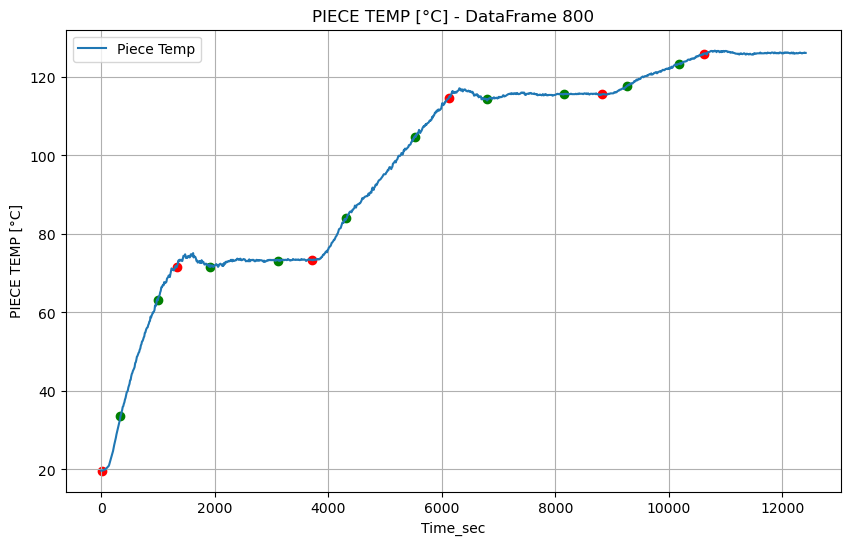

interactive(children=(Dropdown(description='DataFrame:', options=('800', '806', '808', '815', '817', '819', '8…

In [13]:
def plot_data(df_name, plot_type):
    df = excel_dataframes[df_name]

    diff = np.diff(df['SETPOINT [°C]'])
    start_increase_points = np.where((diff > 0) & (np.hstack(([False], diff[:-1])) <= 0))[0] + 1
    stop_increase_points = np.where((diff <= 0) & (np.hstack(([False], diff[:-1])) > 0))[0] + 1
    significant_points = np.unique(np.concatenate(([0], start_increase_points, stop_increase_points)))
    last = significant_points[-1]
    significant_points = significant_points[1:6] if len(significant_points) > 1 else significant_points
    significant_points = np.append(significant_points, last)
    
    intervals = []
    first = significant_points[0]
    for i in significant_points[1:]:
        j = i - first
        intervals.append(int(first + j * 0.25))
        intervals.append(int(first + j * 0.75))
        first = i

    #piece_points = significant_points
    #piece_intervals = intervals
    
     #Chamber Temperatures
    chamber_points = []
    for point in significant_points:
        chamber_points.append(point+20)
    chamber_points[0] = significant_points[0]
    chamber_intervals = []
    for point in intervals:
        chamber_intervals.append(point+20)
    chamber_intervals[0] = intervals[0]

    piece_points = []
    for point in significant_points:
        piece_points.append(point+30)
    piece_points[0] = significant_points[0]
    piece_intervals = []
    for point in intervals:
        piece_intervals.append(point+20)
    piece_intervals[0] = intervals[0]
    
    #chamber_points = [point + 20 for point in significant_points]
    #chamber_points[0] = significant_points[0]
    #chamber_intervals = [point + 20 for point in intervals]
    #chamber_intervals[0] = intervals[0]
    
    plt.figure(figsize=(10, 6))
    
    if plot_type == 'Piece Temperatures':
        plt.plot(df['Time_sec'], df['PIECE TEMP [°C]'], label='Piece Temp')
        plt.scatter(df['Time_sec'].iloc[piece_points], df['PIECE TEMP [°C]'].iloc[piece_points], color='red')
        plt.scatter(df['Time_sec'].iloc[piece_intervals], df['PIECE TEMP [°C]'].iloc[piece_intervals], color='green')
        plt.title(f'PIECE TEMP [°C] - DataFrame {df_name}')
        plt.xlabel('Time_sec')
        plt.ylabel('PIECE TEMP [°C]')
        
    elif plot_type == 'Vacuum Measured':
        plt.plot(df['Time_sec'], df['VACUUM mBar'], label='Vacuum Measured')
        plt.title(f'VACUUM mBar - DataFrame {df_name}')
        plt.xlabel('Time_sec')
        plt.ylabel('VACUUM mBar')
        
    elif plot_type == 'Vacuum Setpoints':
        plt.plot(df['Time_sec'], df['VACUUM SETPOINT mBar'], label='Vacuum Setpoint')
        plt.title(f'VACUUM SETPOINT mBar - DataFrame {df_name}')
        plt.xlabel('Time_sec')
        plt.ylabel('VACUUM SETPOINT mBar')
        
    elif plot_type == 'Chamber Temperatures':
        plt.plot(df['Time_sec'], df['CHAMBER TEMP. [°C]'], label='Chamber Temp')
        plt.scatter(df['Time_sec'].iloc[chamber_points], df['CHAMBER TEMP. [°C]'].iloc[chamber_points], color='red')
        plt.scatter(df['Time_sec'].iloc[chamber_intervals], df['CHAMBER TEMP. [°C]'].iloc[chamber_intervals], color='green')
        plt.title(f'CHAMBER TEMP. [°C] - DataFrame {df_name}')
        plt.xlabel('Time_sec')
        plt.ylabel('CHAMBER TEMP. [°C]')
        
    elif plot_type == 'Setpoints':
        plt.plot(df['Time_sec'], df['SETPOINT [°C]'], label='Setpoint')
        plt.scatter(df['Time_sec'].iloc[significant_points], df['SETPOINT [°C]'].iloc[significant_points], color='red')
        plt.scatter(df['Time_sec'].iloc[intervals], df['SETPOINT [°C]'].iloc[intervals], color='green')
        plt.title(f'SETPOINT [°C] - DataFrame {df_name}')
        plt.xlabel('Time_sec')
        plt.ylabel('SETPOINT [°C]')
        
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widgets
df_dropdown = widgets.Dropdown(
    options=list(excel_dataframes.keys()),
    description='DataFrame:',
    disabled=False,
)

plot_type_dropdown = widgets.Dropdown(
    options=['Piece Temperatures','Vacuum Measured', 'Vacuum Setpoints', 'Chamber Temperatures', 'Setpoints'],
    description='Plot Type:',
    disabled=False,
)

# Create an interactive plot
interactive_plot = widgets.interactive(plot_data, df_name=df_dropdown, plot_type=plot_type_dropdown)
display(interactive_plot)

In [14]:
Ys = Y_OK + Y_NOTOK
Xs = X_OK + X_NOTOK

In [15]:
# Flattening the X values
X_flattened = []
for i in range(len(Xs)):
    X_flattened.append(Xs[i][0] + Xs[i][1])

# Preparing the data
X_flattened = np.array(X_flattened)
Y = np.array(Ys)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, Y, test_size=0.2, random_state=42)


In [16]:

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import GradientBoostingClassifier


classifiers = {
    'Logistic Regression': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'Decision Tree': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('classifier', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('classifier', RandomForestClassifier())
    ]),
    'SVM': Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
#    'Naive Bayes': GaussianNB(),
#    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
for name, classifier in classifiers.items():
    if isinstance(classifier, Pipeline):
        # For pipelines, fit the entire pipeline
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
    else:
        # For standalone classifiers, fit directly
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = (accuracy,report)
    
#for name, accuracy in results.items():
#    print(f'{name}: Accuracy = {accuracy[0]:.2f}')
#    print(f"{name}: Classification Report:\n{accuracy[1]}")


### Scenario 1: Predicting failure based on only metadata and extracted planned curve (Setpoints)

In [17]:

# Create a dropdown widget for selecting the classification method
classifier_dropdown = widgets.Dropdown(
    options=list(results.keys()),
    description='Classifier:',
    disabled=False,
)

# Function to display the selected classifier's results
def display_results(classifier_name):
    accuracy, report = results[classifier_name]
    clear_output(wait=True)
    print(f'{classifier_name}: Accuracy = {accuracy:.2f}')
    print(f'{classifier_name}: Classification Report:\n{report}')

# Create an interactive display for classifier results
interactive_results_display = widgets.interactive(display_results, classifier_name=classifier_dropdown)
display(interactive_results_display)


Logistic Regression: Accuracy = 0.94
Logistic Regression: Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
         100       1.00      0.91      0.95        11

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



interactive(children=(Dropdown(description='Classifier:', options=('Logistic Regression', 'Decision Tree', 'Ra…

In [18]:
#y_test

In [20]:
#y_pred

### Scenario 2: Predicting failure based on all data, including the curve.

In [22]:
X_OK = []
Y_OK = []
X_NOTOK = []
Y_NOTOK = []

# Loop through all dataframes in the dictionary
for key, df in excel_dataframes.items():
    df['Temp Difference [°C]'] = df['SETPOINT [°C]'] - df['CHAMBER TEMP. [°C]']
    X_std_dev_setpoint = df['SETPOINT [°C]'].std()
    X_std_dev_chamber_temp = df['CHAMBER TEMP. [°C]'].std()   
    
    X_vaccum_mean = df['VACUUM mBar'].mean()   
    X_vaccum_std_dev = df['VACUUM mBar'].std()   
    
    
    # Calculate the difference between consecutive points
    diff = np.diff(df['SETPOINT [°C]'])

    # Identify points where the setpoint starts increasing
    start_increase_points = np.where((diff > 0) & (np.hstack(([False], diff[:-1])) <= 0))[0] + 1

    # Identify points where the setpoint stops increasing
    stop_increase_points = np.where((diff <= 0) & (np.hstack(([False], diff[:-1])) > 0))[0] + 1

    # Combine the start and stop points
    significant_points = np.unique(np.concatenate(([0], start_increase_points, stop_increase_points)))
    last = significant_points[-1]
    significant_points = significant_points[1:6]
    significant_points = np.append(significant_points, last)
    
    # Calculate intervals
    significant_points
    intervals = []
    first = significant_points[0]
    for i in significant_points[1:]:
        j = i - first
        intervals.append(int(first + j * 0.25))
        intervals.append(int(first + j * 0.75))
        first = i
        
    X_Point_Values = df.loc[significant_points, 'SETPOINT [°C]'].tolist()
    X_Interval_Values = df.loc[intervals, 'SETPOINT [°C]'].tolist()
    X_Speeds = []
    first = intervals[0]
    for interval in intervals[1:]:
        value_1 = df.loc[first, 'SETPOINT [°C]']
        value_2 = df.loc[interval, 'SETPOINT [°C]']
        X_Speeds.append( (value_2 - value_1) / (interval - first) )
        first = interval
        
        
    #Chamber Temperatures
    chamber_points = []
    for point in significant_points:
        chamber_points.append(point+20)
    chamber_points[0] = significant_points[0]
    chamber_intervals = []
    for point in intervals:
        chamber_intervals.append(point+20)
    chamber_intervals[0] = intervals[0]
    
    X_chamber_Speeds = []
    first = chamber_intervals[0]
    for interval in chamber_intervals[1:]:
        value_1 = df.loc[first, 'CHAMBER TEMP. [°C]']
        value_2 = df.loc[interval, 'CHAMBER TEMP. [°C]']
        X_chamber_Speeds.append( (value_2 - value_1) / (interval - first) )
        first = interval   

    #Piece temperatures
    piece_points = []
    for point in significant_points:
        piece_points.append(point+30)
    piece_points[0] = significant_points[0]
    piece_intervals = []
    for point in intervals:
        piece_intervals.append(point+20)
    piece_intervals[0] = intervals[0]
    
    X_piece_Speeds = []
    first = intervals[0]
    for interval in piece_intervals[1:]:
        value_1 = df.loc[first, 'PIECE TEMP [°C]']
        value_2 = df.loc[interval, 'PIECE TEMP [°C]']
        X_piece_Speeds.append( (value_2 - value_1) / (interval - first) )
        first = interval   
    '''       
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time_sec'], df['PIECE TEMP [°C]'], label='setpoint')
    plt.scatter(df['Time_sec'].iloc[piece_points], df['PIECE TEMP [°C]'].iloc[piece_points], color='red')
    plt.scatter(df['Time_sec'].iloc[piece_intervals], df['PIECE TEMP [°C]'].iloc[piece_intervals], color='green')
    plt.title(f'PIECE TEMP [°C] - DataFrame {key}')
    plt.xlabel('Time_sec')
    plt.ylabel('PIECE TEMP [°C]')
    plt.legend()
    plt.grid(True)
    plt.show()    
    
    
    

        #Plottin Vaccum measured
        plt.figure(figsize=(10, 6))
        plt.plot(df['Time_sec'], df['VACUUM mBar'], label='setpoint')
        #plt.scatter(df['Time_sec'].iloc[piece_points], df['PIECE TEMP [°C]'].iloc[piece_points], color='red')
        #plt.scatter(df['Time_sec'].iloc[piece_intervals], df['PIECE TEMP [°C]'].iloc[piece_intervals], color='green')
        plt.title(f'VACUUM mBar - DataFrame {key}')
        plt.xlabel('Time_sec')
        plt.ylabel('VACUUM mBar')
        plt.legend()
        plt.grid(True)
        plt.show()  
        # Plotting Vaccum setpoints
        plt.figure(figsize=(10, 6))
        plt.plot(df['Time_sec'], df['VACUUM SETPOINT mBar'], label='setpoint')
        #plt.scatter(df['Time_sec'].iloc[significant_points], df['SETPOINT [°C]'].iloc[significant_points], color='red')
        #plt.scatter(df['Time_sec'].iloc[intervals], df['SETPOINT [°C]'].iloc[intervals], color='green')
        #plt.title(f'SETPOINT [°C] - DataFrame {key}')
        #plt.xlabel('Time_sec')
        #plt.ylabel('SETPOINT [°C]')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plotting chamber temperatures
        plt.figure(figsize=(10, 6))
        plt.plot(df['Time_sec'], df['CHAMBER TEMP. [°C]'], label='setpoint')
        plt.scatter(df['Time_sec'].iloc[chamber_points], df['CHAMBER TEMP. [°C]'].iloc[chamber_points], color='red')
        plt.scatter(df['Time_sec'].iloc[chamber_intervals], df['CHAMBER TEMP. [°C]'].iloc[chamber_intervals], color='green')
        plt.title(f'SETPOINT [°C] - DataFrame {key}')
        plt.xlabel('Time_sec')
        plt.ylabel('SETPOINT [°C]')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        #Plot setpoints
        plt.figure(figsize=(10, 6))
        plt.plot(df['Time_sec'], df['SETPOINT [°C]'], label='setpoint')
        plt.scatter(df['Time_sec'].iloc[significant_points], df['SETPOINT [°C]'].iloc[significant_points], color='red')
        plt.scatter(df['Time_sec'].iloc[intervals], df['SETPOINT [°C]'].iloc[intervals], color='green')
        plt.title(f'SETPOINT [°C] - DataFrame {key}')
        plt.xlabel('Time_sec')
        plt.ylabel('SETPOINT [°C]')
        plt.legend()
        plt.grid(True)
        plt.show()
    '''

    #Y
    if int(key) > 100:
        df_y = metadata.loc[metadata['Curve'] == int(key),'quality result'] 
        if df_y.iloc[0] == 100:
            Y_OK.append(df_y.iloc[0])
            #X
            Temperature_Setpoints = df['SETPOINT [°C]'].tolist()
            Vacuum_Setpoints = df['VACUUM SETPOINT mBar'].tolist()
            X_OK.append([X_Point_Values,X_Speeds,X_chamber_Speeds,X_piece_Speeds,X_std_dev_chamber_temp,X_std_dev_setpoint,X_vaccum_mean,X_vaccum_std_dev])
        else:
            Y_NOTOK.append(df_y.iloc[0])
            #X
            Temperature_Setpoints = df['SETPOINT [°C]'].tolist()
            Vacuum_Setpoints = df['VACUUM SETPOINT mBar'].tolist()
            X_NOTOK.append([X_Point_Values,X_Speeds,X_chamber_Speeds,X_piece_Speeds,X_std_dev_chamber_temp,X_std_dev_setpoint,X_vaccum_mean,X_vaccum_std_dev])
    else:
            Y_NOTOK.append(0)
            #X
            Temperature_Setpoints = df['SETPOINT [°C]'].tolist()
            Vacuum_Setpoints = df['VACUUM SETPOINT mBar'].tolist()
            X_NOTOK.append([X_Point_Values,X_Speeds,X_chamber_Speeds,X_piece_Speeds,X_std_dev_chamber_temp,X_std_dev_setpoint,X_vaccum_mean,X_vaccum_std_dev])
            
#Y_OK = np.array(Y_OK)
#Y_NOTOK = np.array(Y_NOTOK)        

In [23]:
Ys = Y_OK + Y_NOTOK
Xs = X_OK + X_NOTOK

In [24]:
# Flattening the X values
X_flattened = []
for i in range(len(Xs)):
    X_flattened.append(Xs[i][0] + Xs[i][1])

# Preparing the data
X_flattened = np.array(X_flattened)
Y = np.array(Ys)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, Y, test_size=0.2, random_state=42)


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier


classifiers = {
    'Logistic Regression': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'Decision Tree': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('classifier', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('classifier', RandomForestClassifier())
    ]),
    'SVM': Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
#    'Naive Bayes': GaussianNB(),
#    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
for name, classifier in classifiers.items():
    if isinstance(classifier, Pipeline):
        # For pipelines, fit the entire pipeline
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
    else:
        # For standalone classifiers, fit directly
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = (accuracy,report)

Logistic Regression: Accuracy = 0.94
Logistic Regression: Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
         100       1.00      0.91      0.95        11

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18

Decision Tree: Accuracy = 1.00
Decision Tree: Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
         100       1.00      1.00      1.00        11

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Random Forest: Accuracy = 1.00
Random Forest: Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
         100      

In [ ]:

# Create a dropdown widget for selecting the classification method
classifier_dropdown = widgets.Dropdown(
    options=list(results.keys()),
    description='Classifier:',
    disabled=False,
)

# Function to display the selected classifier's results
def display_results(classifier_name):
    accuracy, report = results[classifier_name]
    clear_output(wait=True)
    print(f'{classifier_name}: Accuracy = {accuracy:.2f}')
    print(f'{classifier_name}: Classification Report:\n{report}')

# Create an interactive display for classifier results
interactive_results_display = widgets.interactive(display_results, classifier_name=classifier_dropdown)
display(interactive_results_display)
